<a href="https://colab.research.google.com/github/riverSun1/data-science-projects-2024/blob/main/02_scikit_learn_decision_tree_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 사이킷런의 피마인디언(Pima people) 당뇨병 데이터 #

In [9]:
# 1. 데이터셋 출처 #
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [10]:
# 1.1 데이터 구성 #
# Pregnancies: 임신 횟수
# Glucose: 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
# BloodPressure: 이완기 혈압(mm Hg)
# SkinThickness: 삼두근 피부 주름 두께(mm), 체지방을 추정하는데 사용되는 값
# Insulin: 2시간 혈청 인슐린(mu U / ml)
# BMI: 체질량 지수(체중kg / 키(m)^2)
# DiabetesPedigreeFunction: 당뇨병 혈통 기능
# Age: 나이
# Outcome: 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

In [11]:
# 2. 필요한 라이브러리 로드 #
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot을 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
# 3. 데이터셋 로드 #
df = pd.read_csv("/diabetes.csv", encoding = "UTF-8")
df.shape # 행과 열

(768, 9)

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# 4. 학습, 예측 데이터셋 나누기 #
# 8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count라는 변수에 담습니다.
int(df.shape[0] * 0.8)
split_count = int(df.shape[0] * 0.8)
split_count

614

In [16]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
#df
#df[:]
df[:split_count]
train = df[:split_count].copy()
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0
610,3,106,54,21,158,30.9,0.292,24,0
611,3,174,58,22,194,32.9,0.593,36,1
612,7,168,88,42,321,38.2,0.787,40,1


In [17]:
df[split_count:]
test = df[split_count:].copy()
test

# train data 80%, test data 20%.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
614,11,138,74,26,144,36.1,0.557,50,1
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0
617,2,68,62,13,15,20.1,0.257,23,0
618,9,112,82,24,0,28.2,1.282,50,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
# 5. 학습, 예측에 사용할 컬럼 #
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
train.columns[:-1].tolist()
feature_names = train.columns[:-1].tolist()
feature_names # 여러 개의 값을 가져와야 하기 때문에 리스트 형태

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [19]:
# 6. 정답값이자 예측해야 될 값 #
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
train.columns[-1]
label_name = train.columns[-1]
label_name # 여러개가 아니기 때문에 string 형태

'Outcome'

In [20]:
# 7. 학습, 예측 데이터셋 만들기 #

In [21]:
# 학습 세트 만들기 예) 시험의 기출문제 #
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답 #
# 당뇨병일 때는 1, 아닐 때는 0.
y_train = train[label_name]
print(X_train.shape)
y_train.head()

(614, 8)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [23]:
# 예측에 사용할 데이터 세트를 만듭니다. 예) 실전 시험 문제 #
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [24]:
# 예측의 정답값 예) 실전 시험 문제의 정답 #
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [26]:
# 8. 머신러닝 알고리즘 가져오기 #
from sklearn.tree import DecisionTreeClassifier # 당뇨병인지 아닌지 분류. # 인슐린 수치 분석은 DecisionTreeRegressor.

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [27]:
# 9. 학습(훈련) - 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다. #
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# 10. 예측 - 실전 시험문제(X_train)라고 보면 됩니다. 우리가 정답을 직접 예측합니다. #
model.predict(X_train) # 당뇨병이거나 당뇨병이 아니거나.
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

In [ ]:
# 11. 트리 알고리즘 분석하기 - 의사 결정 나무를 시각화 합니다.

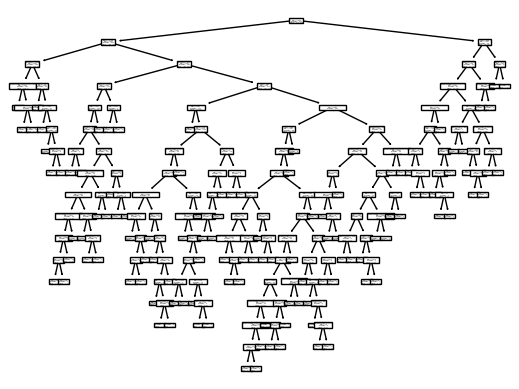

In [33]:
from sklearn.tree import plot_tree
plot_tree(model,feature_names=feature_names)
tree = plot_tree(model,feature_names=feature_names)

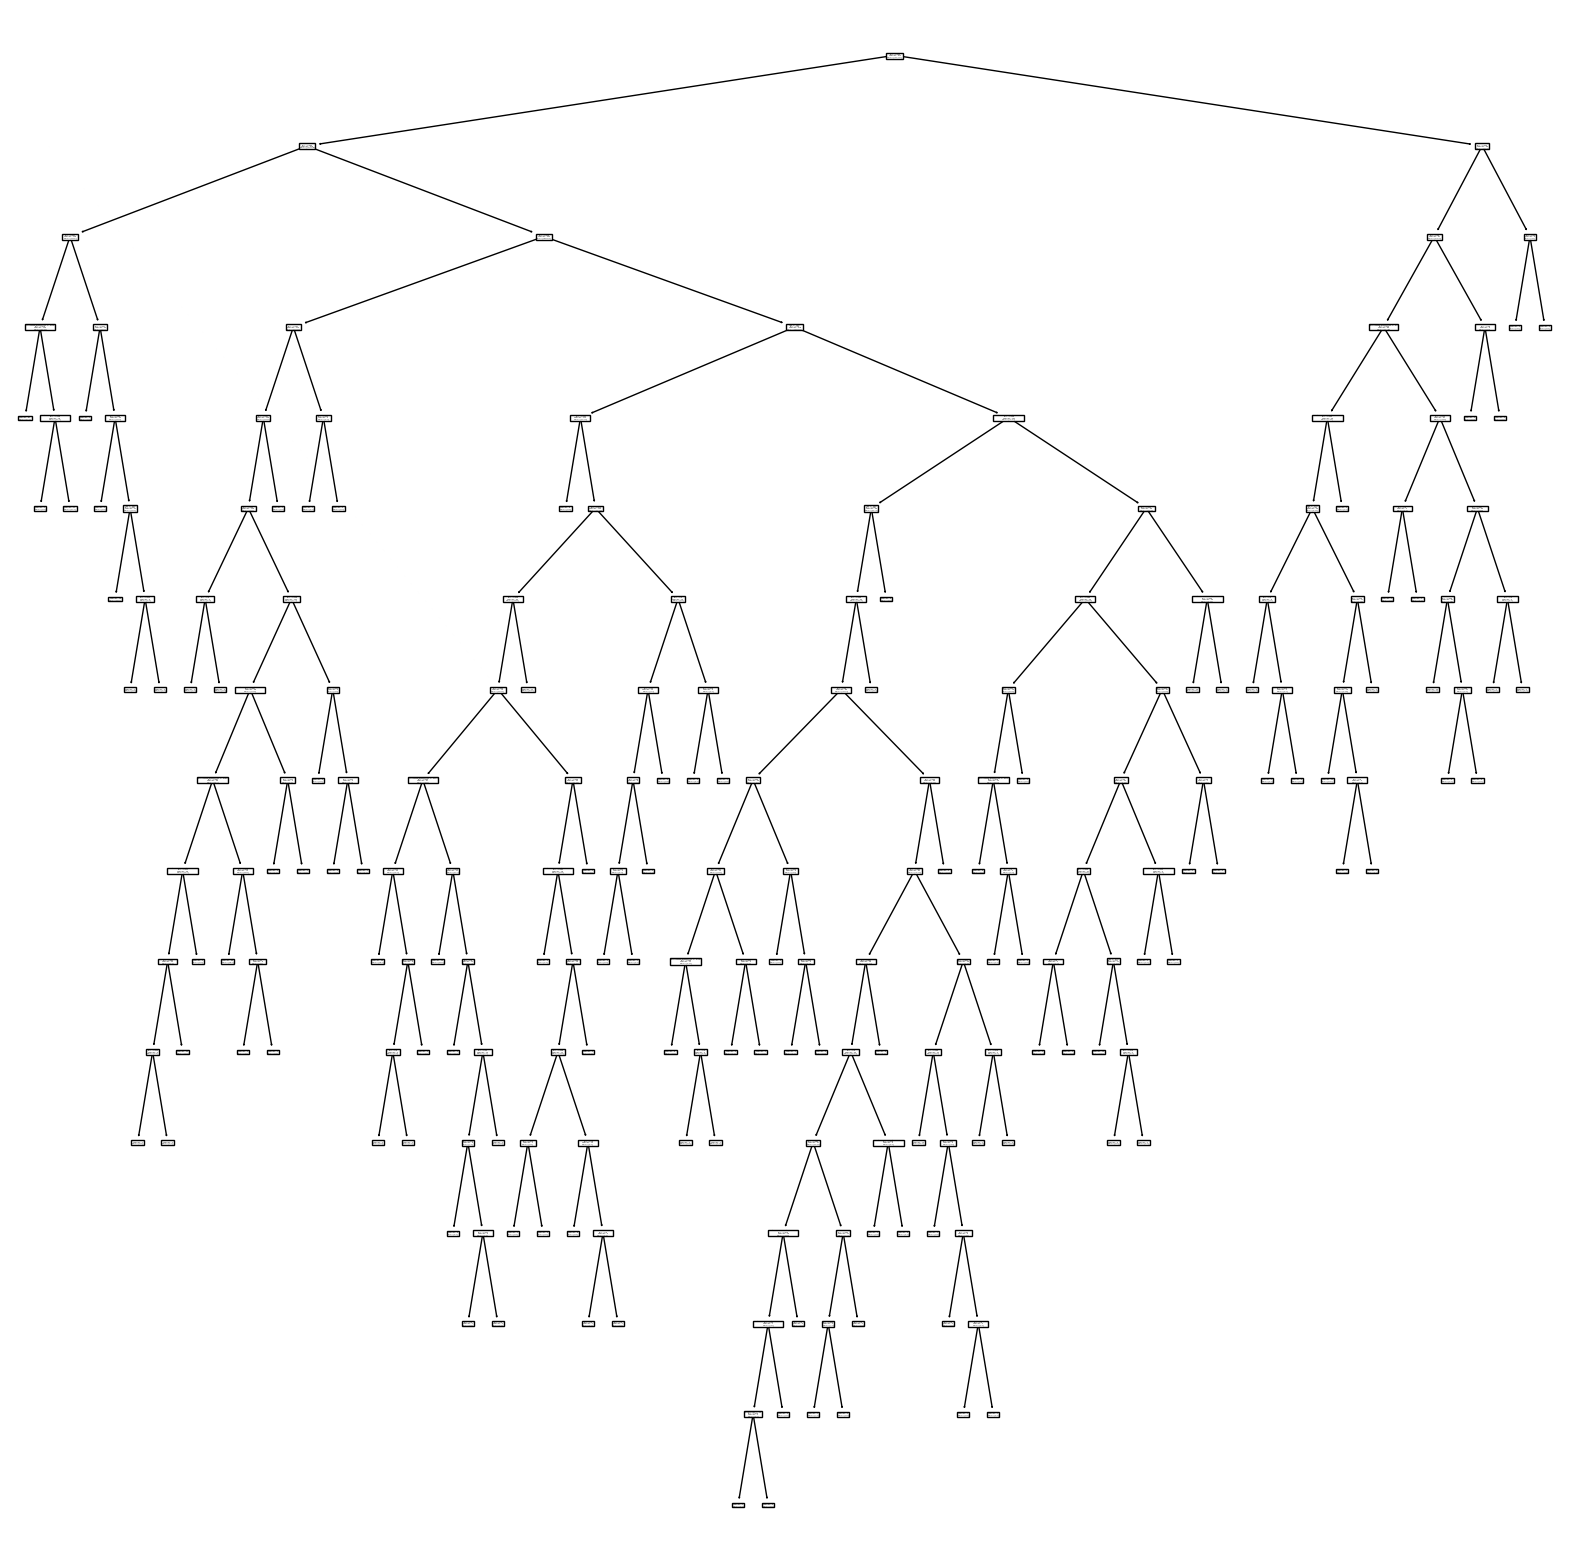

In [34]:
plt.figure(figsize=(20, 20))
plot_tree(model,feature_names=feature_names)
tree = plot_tree(model,feature_names=feature_names)

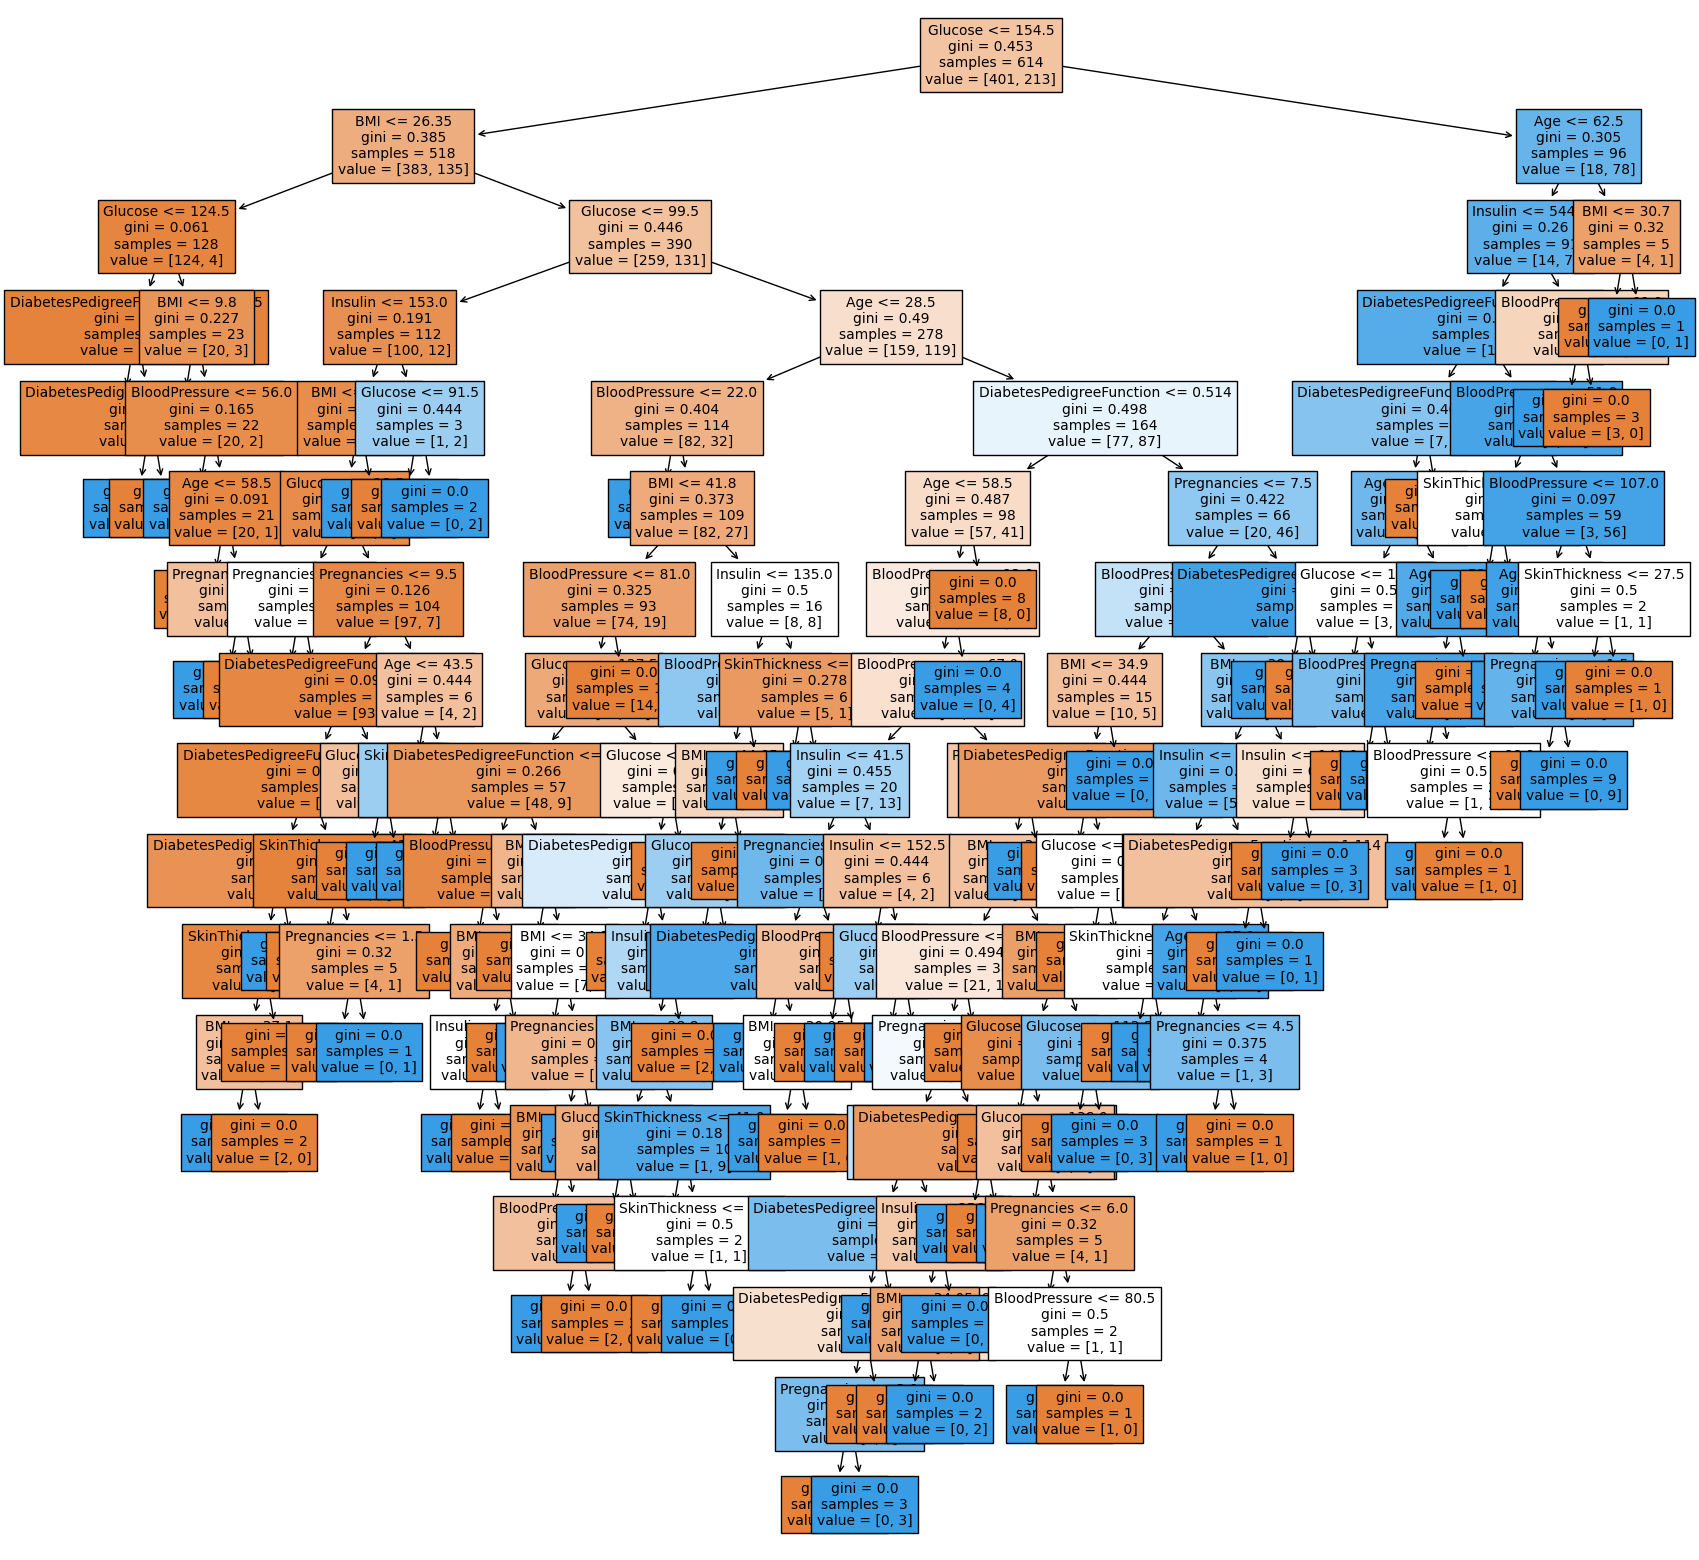

In [35]:
plt.figure(figsize=(20, 20))
plot_tree(model,feature_names=feature_names)
tree = plot_tree(model,feature_names=feature_names,filled=True,fontsize=10)

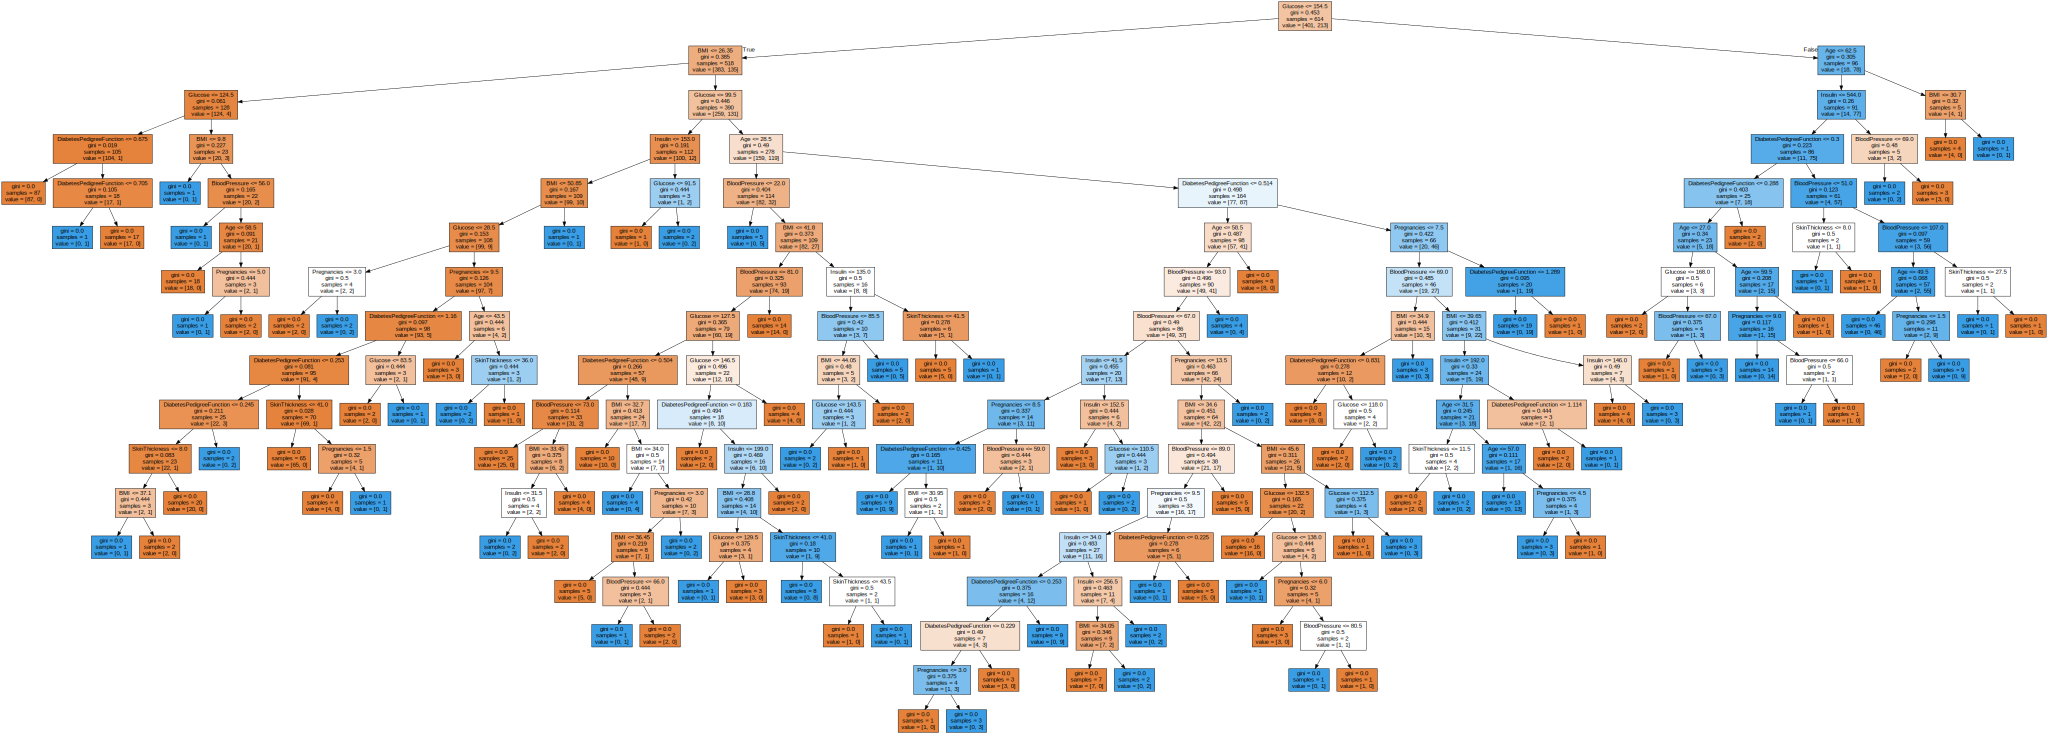

In [36]:
# graphviz 를 통해 시각화 합니다.
# graphviz 는 별도의 설치가 필요합니다.
# graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해 주셔야 합니다.
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names, filled=True)
graphviz.Source(dot_tree)

In [37]:
# 피처의 중요도를 추출하기
model.feature_importances_

array([0.08885507, 0.31075127, 0.11295356, 0.03504852, 0.07836569,
       0.18292105, 0.11028754, 0.0808173 ])

<Axes: >

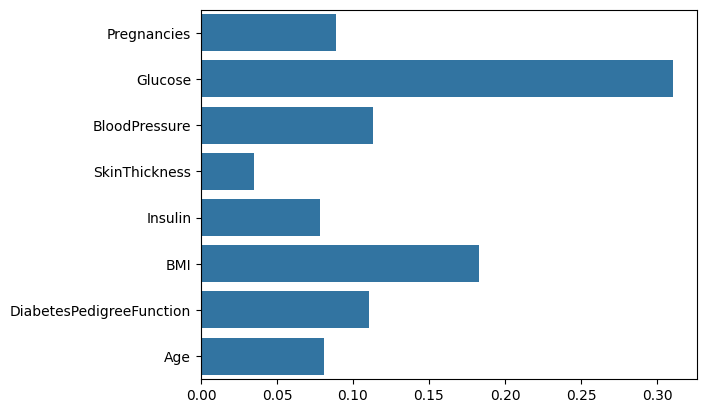

In [38]:
# 피처의 중요도 시각화 하기
sns.barplot(x=model.feature_importances_, y=feature_names)

In [41]:
# 12. 정확도(Accuracy) 측정하기 #
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
abs(y_test - y_predict).sum()
diff_count = abs(y_test - y_predict).sum()
diff_count

44

In [45]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.
(len(y_test) - diff_count) / len(y_test) * 100

71.42857142857143

In [46]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) * 100

71.42857142857143

In [47]:
# model의 score로 점수를 계산합니다.
model.score(X_test, y_test) * 100

71.42857142857143